In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import torch
import torch.nn as nn
from scipy.stats import skew, kurtosis
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
torch.manual_seed(0)
tf = 30
dt = 0.001
N = round(tf/dt)
t = np.arange(0, tf, dt)

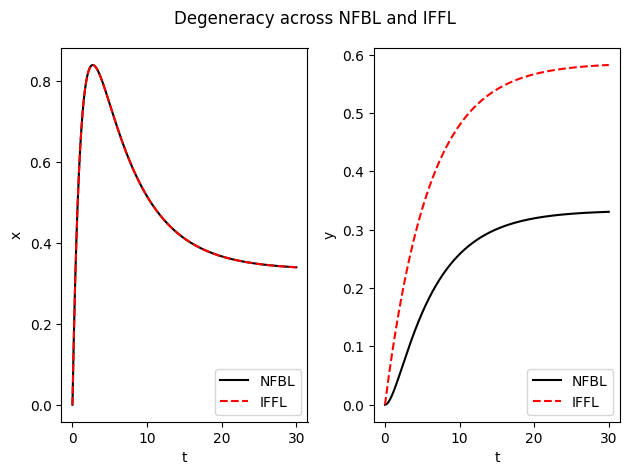

In [6]:
# NBFL vs IFFL degeneracy
D = 0 #noise
#Fixed parameters k1, k2, k3, k4
k1, k2 = 1, 2
k3, k4 = 0.05, 0.05
sgma = 0 # xi
A = 1
x = np.zeros(N)
y = np.zeros(N)

#NBFL-1
for j in range(N-1):
    k1x = -k1*x[j]-k2*y[j]+A
    k1y = k3*x[j]-k4*y[j]+sgma*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -k1*ax-k2*ay+A
    k2y = k3*ax-k4*ay+sgma*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    y[j+1] = y[j]+(k1y+k2y)*dt/2
xp=max(x)
tp = np.where(x==xp)[0][0]
try:
    id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
except:
    id_ss = np.where((np.diff(x)>0)==False)[0][-1]

x50 = xp - (xp-x[id_ss])/2
t50 = np.where(x==x50)[0]
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'k', label="NFBL")
plt.subplot(122)
plt.plot(t,y,'k', label="NFBL")

#IFFL-1
K1 = .8794
K3 = 0
K4 = 0.1706
K2 = 1.206
sgma = 0.1
x = np.zeros(N)
y = np.zeros(N)
for j in range(N-1):
    k1x = -K1*x[j]-K2*y[j]+A
    k1y = K3*x[j]-K4*y[j]+sgma*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -K1*ax-K2*ay+A
    k2y = K3*ax-K4*ay+sgma*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    y[j+1] = y[j]+(k1y+k2y)*dt/2
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'r--', label="IFFL")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(loc="lower right")
plt.subplot(122)
plt.plot(t,y,'r--', label="IFFL")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.suptitle("Degeneracy across NFBL and IFFL")
plt.tight_layout()

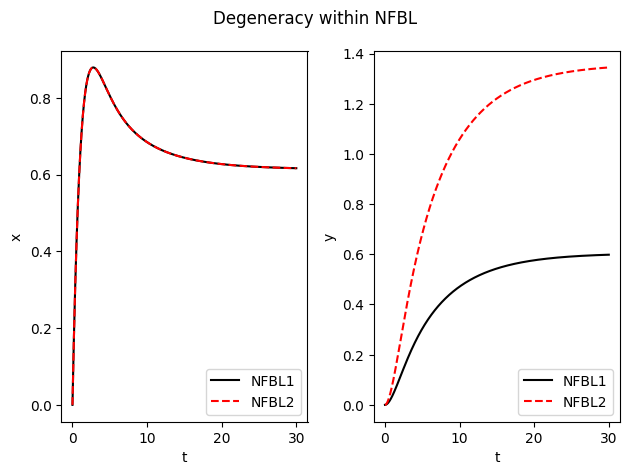

In [4]:
# NBFL-1 vs NBFL-2
D=0#1e-3 #noise
#random indicies of y 
points = 5
idrands = np.random.randint(10, 3000, points)
k1,k2 = np.random.uniform(low=0.8, high=1.3, size=(2,))
k3,k4 = np.random.uniform(low=0.08, high=0.13, size=(2,))
sgma = 0
A = 1
x = np.zeros(N)
y = np.zeros(N)
#NBFL-1
for j in range(N-1):
    k1x = -k1*x[j]-k2*y[j]*x[j]+A
    k1y = k3*x[j]-k4*y[j]+sgma*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -k1*ax-k2*ay*ax+A
    k2y = k3*ax-k4*ay+sgma*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
    y[j+1] = y[j]+(k1y+k2y)*dt/2
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'k', label="NFBL1")
plt.subplot(122)
plt.plot(t,y,'k', label="NFBL1")
#NBFL-2
k_1 = k1
k_2 = 0.5
k_3 = k2*k3/k_2
k_4 = k4
x = np.zeros(N)
y = np.zeros(N)
for j in range(N-1):
    k1x = -k_1*x[j]-k_2*y[j]*x[j]+A
    k1y = k_3*x[j]-k_4*y[j]+sgma*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -k_1*ax-k_2*ay*ax+A
    k2y = k_3*ax-k_4*ay+sgma*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
    y[j+1] = y[j]+(k1y+k2y)*dt/2
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'r--', label="NFBL2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(loc="lower right")
plt.subplot(122)
plt.plot(t,y,'r--', label="NFBL2")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.suptitle("Degeneracy within NFBL")
plt.tight_layout()


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


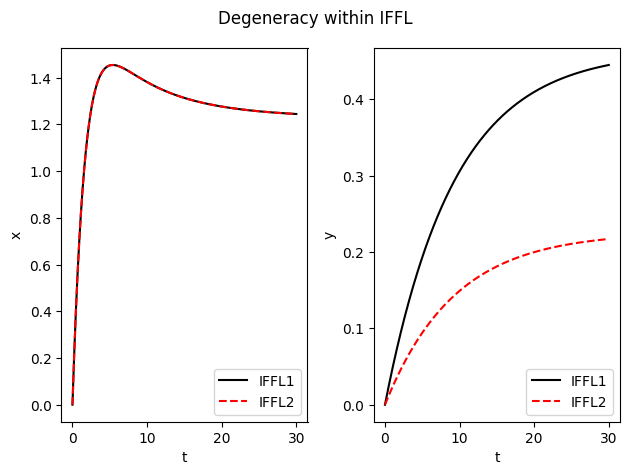

In [5]:
# IFFL-1 vs IFFL-2
D=0#1e-3 #noise
K1,K2 = np.random.uniform(low=0.3, high=0.7, size=(2,))
K3 = 0
K4 = np.random.uniform(low=0.08, high=0.13, size=(1,))
sgma = 0.05
A = 1
x = np.zeros(N)
y = np.zeros(N)
#IFFL-1
for j in range(N-1):
    k1x = -K1*x[j]-K2*y[j]*x[j]+A
    k1y = K3*x[j]-K4*y[j]+sgma*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -K1*ax-K2*ay*ax+A
    k2y = K3*ax-K4*ay+sgma*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
    y[j+1] = y[j]+(k1y+k2y)*dt/2
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'k', label="IFFL1")
plt.subplot(122)
plt.plot(t,y,'k', label="IFFL1")
#IFFL-2
K_1 = K1
K_2 = 1.0
K_3 = K3
K_4 = K4
sgma_ = K2*sgma/K_2
x = np.zeros(N)
y = np.zeros(N)
for j in range(N-1):
    k1x = -K_1*x[j]-K_2*y[j]*x[j]+A
    k1y = K_3*x[j]-K_4*y[j]+sgma_*A
    ax = x[j]+k1x*dt
    ay = y[j]+k1y*dt
    k2x = -K_1*ax-K_2*ay*ax+A
    k2y = K_3*ax-K_4*ay+sgma_*A
    x[j+1] = x[j]+(k1x+k2x)*dt/2
    x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
    y[j+1] = y[j]+(k1y+k2y)*dt/2
plt.figure(1)
plt.subplot(121)
plt.plot(t,x,'r--', label="IFFL2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(loc="lower right")
plt.subplot(122)
plt.plot(t,y,'r--', label="IFFL2")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.suptitle("Degeneracy within IFFL")
plt.tight_layout()

In [6]:
plt.figure(dpi=1200)
plt.axhline(y = xp, color = 'b', linestyle = '--', xmin=0, 
xmax=tp*dt*.05) 
plt.axvline(x = tp*dt, linestyle = "--", ymin = 0, ymax=xp+.075)
plt.axhline(y = x[id_ss], color = 'b', linestyle = '--', xmin=0, 
xmax=id_ss*dt*.031)
plt.axvline(x = id_ss*dt, linestyle = "--", ymin = 0, ymax=x[id_ss]
+.05)
plt.axhline(y = x50, color = 'b', linestyle = '--', xmin=0, 
xmax=7*.04) 
#plt.axvline(x = t50, linestyle = "--", ymin = 0, ymax=x50+.07)
plt.text(tp*dt-.5, -.05,r'$t_p$',rotation=0)
plt.text(t50-.5, -.05,r'$t_{50}$',rotation=0)
plt.text(id_ss*dt-1.75, -.05,r'$t_{ss}$',rotation=0)
plt.text(-3, xp,r'$x_p$',rotation=0)
plt.text(-3, x[id_ss],r'$x_{ss}$',rotation=0)
plt.text(-3, x50-.04,r'$x_{50}$',rotation=0)
plt.ylim(0, 0.9)
plt.plot(t, x,'k', label="NFBL")
plt.title("Attributes")

Text(0.5, 1.0, 'Attributes')

Error in callback <function _draw_all_if_interactive at 0x0000029BE48CCC20> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 7680x5760 with 1 Axes>

### Data generation

In [7]:
# NBFL-1 vs IFFL-1
D = 1e-3 #noise
trials = 2000
for m in [1]: 
    lbs = []
    signal = []
    for i in range(trials):
        #Random timestamps for y points
        """idrand = np.random.randint(100, 3000)
        idrand2 = np.random.randint(100, 3000)"""
        
        #random indicies of y 
        points = 5
        idrands = np.random.randint(10, 3000, points)
        #Randomize parameters k1, k2, k3, k4
        k1, k2 = np.random.uniform(low=0.9, high=1.1, size=(2,))
        k3, k4 = np.random.uniform(low=0.09, high=0.11, size=(2,))
        sgma = 0
        A = 1;
        
        x = np.zeros(N)
        y = np.zeros(N)
        
        #NBFL-1
        for j in range(N-1):
            k1x = -k1*x[j]-k2*y[j]*x[j]+A
            k1y = k3*x[j]-k4*y[j]+sgma*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -k1*ax-k2*ay*ax+A
            k2y = k3*ax-k4*ay+sgma*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
            
            #Calculate attributes
            #X_max, t of X_max, X_ss, t of X_ss, 
            #Xp - max value of X
            #tp - time of Xp
            #x_ss - steady state
            #t_ss - time when steady state reached
            #x50 - 50% of amplitude on drop
            #t50 - time of x50
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
            #add attributes to output and random points
            #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
            #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
            #add to labels output
        lbs.append(0)
        """plt.figure(1)
        plt.subplot(121)
        plt.plot(t,x,'k', label="NFBL")
        plt.subplot(122)
        plt.plot(t,y,'k', label="NFBL")"""
            
        #IFFL-1
        #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A])
        if k3 > 0:
            xbar = (-(k1*k4+k2*sgma*A)+np.sqrt((k1*k4+k2*sgma*A)**2+4*k2*k3*k4*A))/(2*k2*k4)
        K1 = k1
        K3 = 0
        K4 = k4*k1/K1
        K2 = k2
        sgma = (K4*A/xbar-K1*K4)/(K2*A)
            
        x = np.zeros(N)
        y = np.zeros(N)
        for j in range(N-1):
            k1x = -K1*x[j]-K2*y[j]*x[j]+A
            k1y = K3*x[j]-K4*y[j]+sgma*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -K1*ax-K2*ay*ax+A
            k2y = K3*ax-K4*ay+sgma*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
                
        #Calculate attributes
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
            
        lbs.append(1)
        if i%500==0:
            print(i)
            """plt.figure(1)
            plt.subplot(121)
            plt.plot(t,x,'r--', label="IFFL")
            plt.xlabel("t")
            plt.ylabel("x")
            plt.axvline(x = id_ss*dt)
            plt.legend(loc="lower right")
            plt.subplot(122)
            plt.plot(t,y,'r--', label="IFFL")
            plt.xlabel("t")
            plt.ylabel("y")
            plt.legend(loc="lower right")"""

    np.savetxt("data/nl_signal_yrand2.dat",signal)
    np.savetxt("data/nl_lbs_yrand2.dat",lbs)
    #print("data not saved")

# Modificado usando gendata_IFFL_NFBL_yrandom_2points.ipynb

0
500
1000
1500


In [8]:
# NBFL-1 vs NBFL-2
D=1e-3 #noise
trials=2000
for m in [1]:
    lbs=[]
    signal=[]
    for i in range(trials):
        """idrand = np.random.randint(100,3000)
        idrand2 = np.random.randint(100,3000)"""
        #random indicies of y 
        points = 5
        idrands = np.random.randint(10, 3000, points)
        k1,k2 = np.random.uniform(low=0.8, high=1.3, size=(2,))
        k3,k4 = np.random.uniform(low=0.08, high=0.13, size=(2,))
        sgma = 0
        A = 1
        x = np.zeros(N)
        y = np.zeros(N)
        
        #NBFL-1
        for j in range(N-1):
            k1x = -k1*x[j]-k2*y[j]*x[j]+A
            k1y = k3*x[j]-k4*y[j]+sgma*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -k1*ax-k2*ay*ax+A
            k2y = k3*ax-k4*ay+sgma*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
        lbs.append(0)
        #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A])
        """ plt.figure(1)
        plt.subplot(121)
        plt.plot(t,x,'k')
        plt.subplot(122)
        plt.plot(t,y,'k') """
        
        #NBFL-2    
        k_1 = k1
        k_2 = 0.5
        k_3 = k2*k3/k_2
        k_4 = k4
        x = np.zeros(N)
        y = np.zeros(N)
        for j in range(N-1):
            k1x = -k_1*x[j]-k_2*y[j]*x[j]+A
            k1y = k_3*x[j]-k_4*y[j]+sgma*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -k_1*ax-k_2*ay*ax+A
            k2y = k_3*ax-k_4*ay+sgma*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
        #signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
        lbs.append(1)
        """ plt.figure(1)
        plt.subplot(121)
        plt.plot(t,x,'r--')
        plt.subplot(122)
        plt.plot(t,y,'r--') """
        if i%500==0:
            print(i)
    np.savetxt("data/nfbl_vs_nfbl_signal_yrand2.dat",signal)
    np.savetxt("data/nfbl_vs_nfbl_lbs_yrand2.dat",lbs)

0
500
1000
1500


In [9]:
# IFFL-1 vs IFFL-2
D=1e-3 #noise
trials=2000
for m in [1]:
    lbs=[]
    signal=[]
    for i in range(trials):
        """idrand = np.random.randint(100,3000)
        idrand2 = np.random.randint(100,3000)""" 
        #random indicies of y 
        points = 5
        idrands = np.random.randint(100, 3000, points)
        K1, K2 = np.random.uniform(low=0.3, high=0.7, size=(2,))
        K3 = 0
        K4 = np.random.uniform(low=0.08, high=0.13, size=(1,))
        sgma = 0.05
        A = 1
        x = np.zeros(N)
        y = np.zeros(N)
        
        #IFFL-1
        for j in range(N-1):
            k1x = -K1*x[j]-K2*y[j]*x[j]+A
            k1y = K3*x[j]-K4*y[j]+sgma*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -K1*ax-K2*ay*ax+A
            k2y = K3*ax-K4*ay+sgma*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
        lbs.append(0)
        
        #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A])
        """plt.figure(1)
        plt.subplot(121)
        plt.plot(t,x,'k')
        plt.ylim([0,2])
        plt.subplot(122)
        plt.plot(t,y,'k')"""
        
        #IFFL-2
        K_1 = K1
        K_2 = 1.0
        K_3 = K3
        K_4 = K4
        sgma_ = K2*sgma/K_2
        x = np.zeros(N)
        y = np.zeros(N)
        for j in range(N-1):
            k1x = -K_1*x[j]-K_2*y[j]*x[j]+A
            k1y = K_3*x[j]-K_4*y[j]+sgma_*A
            ax = x[j]+k1x*dt
            ay = y[j]+k1y*dt
            k2x = -K_1*ax-K_2*ay*ax+A
            k2y = K_3*ax-K_4*ay+sgma_*A
            x[j+1] = x[j]+(k1x+k2x)*dt/2
            x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0) 
            y[j+1] = y[j]+(k1y+k2y)*dt/2
        xp=max(x)
        x50=xp - (xp-x[-1])/2
        try:
            id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
        except:
            id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], skew(x), kurtosis(x)] + list(y[idrands]))
        lbs.append(1)
        
        """plt.figure(1)
        plt.subplot(121)
        plt.plot(t,x,'r--')
        plt.ylim([0,2])
        plt.subplot(122)
        plt.plot(t,y,'r--')"""
        if i%100==0:
            print(i)
    np.savetxt("data/iffl_vs_iffl_signal_yrand2.dat",signal)
    np.savetxt("data/iffl_vs_iffl_lbs_yrand2.dat",lbs)

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [10]:
class Net_relu(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net_relu,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_softmax = nn.Sequential(
        nn.Linear(D_in,H),
        nn.ReLU(),
        nn.Linear(H,D_out),
        nn.Softmax()
        )
        
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_softmax(x)
        return logits
    
#Attribute labels
labels = ["xp", "t for xp", "xss", "t for xss", "x50", "t for x50", 
"skew(x)", "kurtosis(x)", "y1", "y2", "y3", "y4", "y5"]
models = []
acc = []

for m in range(6):
    #iterate through # of y points to include in data
    data_cxy = np.loadtxt("data/nl_signal_yrand2.dat").astype(np.float32)[:, 0:8+m]
    label_cxy = np.loadtxt("data/nl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)
    print("training with", len(data_cxy[0]), "attributes")
    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10
    
    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()
    my_data_train = []
    my_data_val = []
    
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else: 
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
            
    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)
    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 2000
    
    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
        correct = 0
        for x_test, y_test in val_set:
            z = model(x_test)
            _, yhat = torch.max(z.data,1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        
    train_model(epochs)
    acc.append(accuracy_list[-1])
    models.append(model)
    
    print(m, "data points", "accuracy:", acc[-1])

training with 8 attributes


Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0 data points accuracy: 0.771
training with 9 attributes
1 data points accuracy: 0.772
training with 10 attributes
2 data points accuracy: 0.777
training with 11 attributes
3 data points accuracy: 0.773
training with 12 attributes
4 data points accuracy: 0.772
training with 13 attributes
5 data points accuracy: 0.777


(0.4, 1.0)

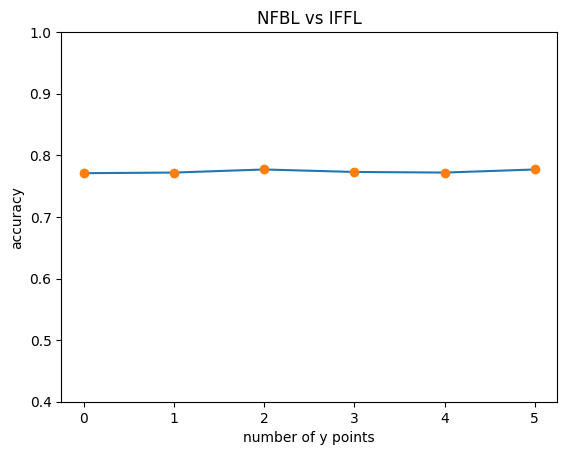

In [11]:
plt.plot(np.arange(6), acc)
plt.plot(np.arange(6), acc, "o")
plt.ylabel("accuracy")
plt.xlabel("number of y points")
plt.title("NFBL vs IFFL")
plt.ylim(.4, 1)

In [12]:
#Calculate SHAP values https://shap.readthedocs.io/en/latest/
shap_proportions = []
for i, model in enumerate(models):
    print(i)
    explainer = shap.DeepExplainer(model, data_cxy[:100, 0:8+i])
    shap_values = explainer.shap_values(data_cxy[:, 0:8+i])
    average_shap_values = np.average(shap_values, axis=1)
    abs_average_shap_values = np.absolute(average_shap_values)
    sum_abs_average_shap_values = np.sum(abs_average_shap_values, axis=0)
    proportions = sum_abs_average_shap_values/np.sum(sum_abs_average_shap_values)
    shap_proportions.append(proportions)
    
modified_shap_proportion = []
for i, shap_proportion in enumerate(shap_proportions):
    if len(shap_proportion) == 6:
        modified_shap_proportion.append(np.concatenate((shap_proportion, [0,0,0])))
    elif len(shap_proportion) == 7:
        modified_shap_proportion.append(np.concatenate((shap_proportion, [0,0])))
    elif len(shap_proportion) == 8:
        modified_shap_proportion.append(np.concatenate((shap_proportion, [0])))
    else:
        modified_shap_proportion.append(np.concatenate((shap_proportion[:8], [np.sum(shap_proportion[8:])])))
        np_modified_shap_proportion = np.array(modified_shap_proportion).T

# shap.summary_plot(abs_average_shap_values, labels, plot_type="bar")

0


unrecognized nn.Module: Flatten


1
2
3
4
5


Text(0.5, 1.0, 'NFBL vs IFFL SHAP Values')

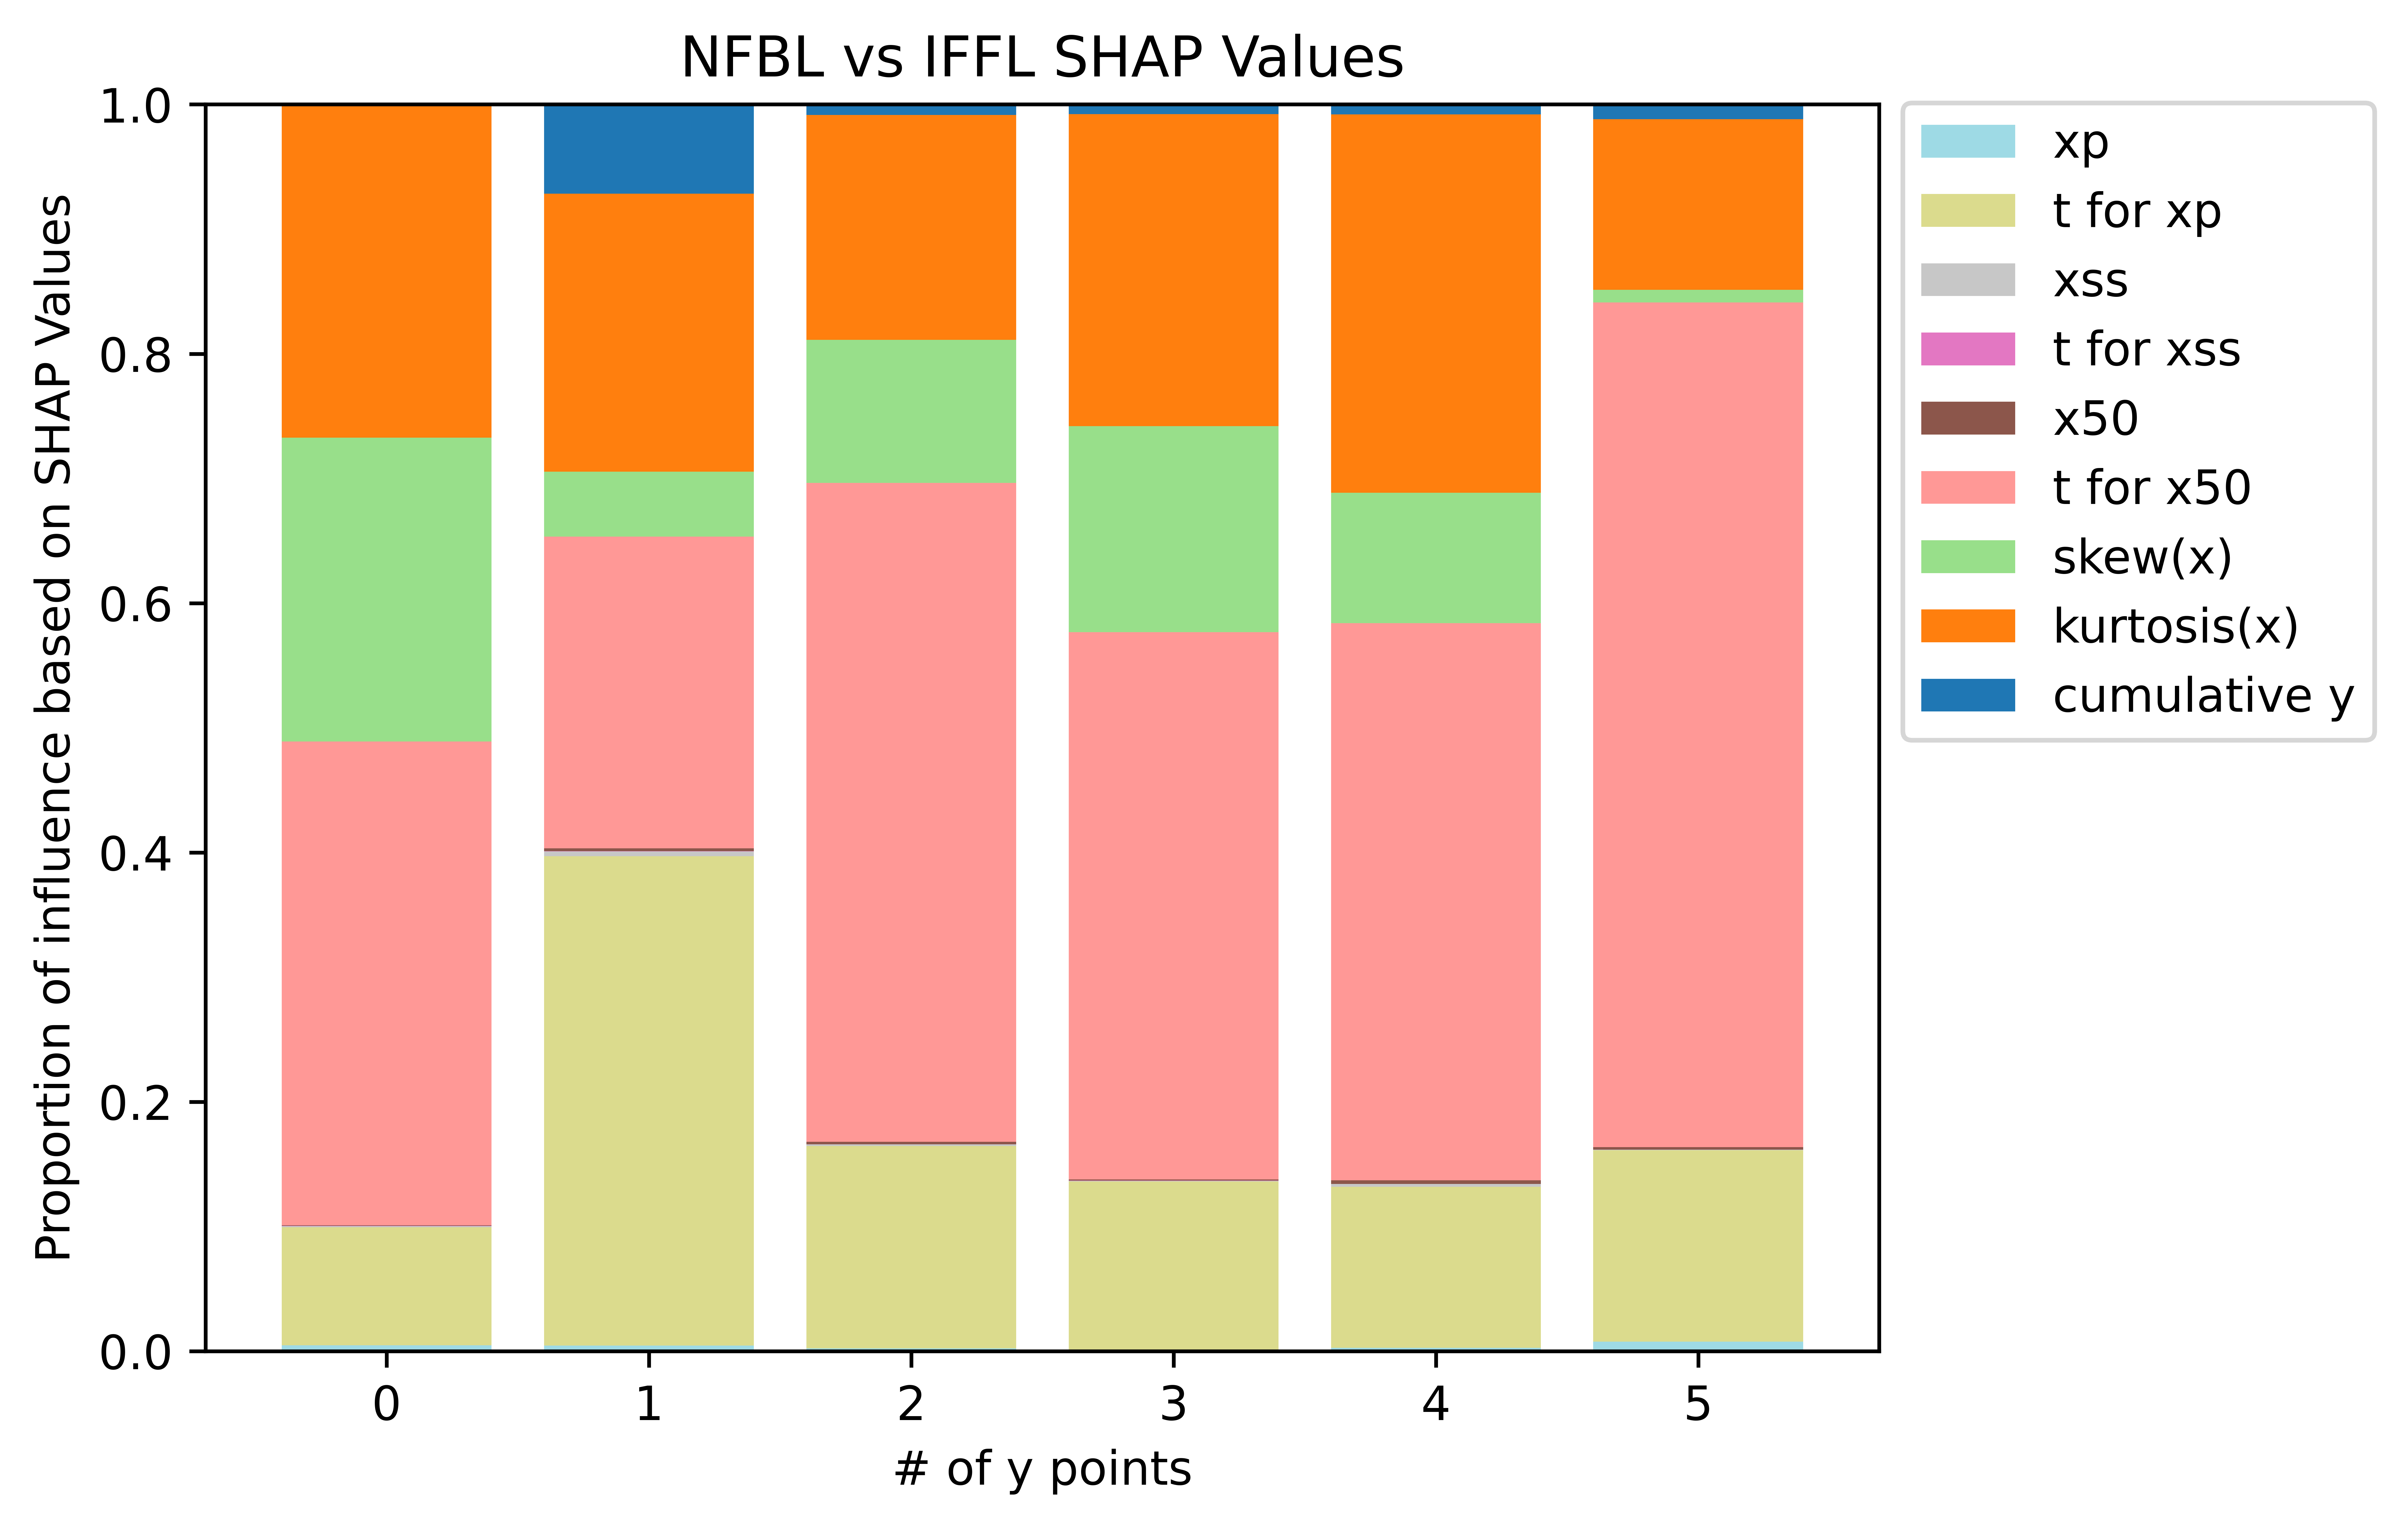

In [13]:
colors = colormaps.get_cmap("tab20")
slicedCM = colors(np.linspace(0, 1, len(np_modified_shap_proportion)))
plt.figure(dpi=1200)
bottom = [0] * len(np_modified_shap_proportion[0])
for i, value in enumerate(np_modified_shap_proportion):
    plt.bar(np.arange(6), value, bottom=bottom, label=labels[i] if i != 8 else "cumulative y", color=slicedCM[len(np_modified_shap_proportion)-i-1]) 
    bottom += value
plt.legend(bbox_to_anchor=(1.0, 1.02), loc="upper left")
plt.xlabel("# of y points")
plt.ylabel("Proportion of influence based on SHAP Values")
plt.title("NFBL vs IFFL SHAP Values")

In [14]:
#Train list of models, ranging from 0-5 number of y values included into attributes
models = []
acc = []
for m in range(6):
    data_cxy = np.loadtxt("data/nfbl_vs_nfbl_signal_yrand2.dat").astype(np.float32)[:, 0:8+m]
    label_cxy = np.loadtxt("data/nfbl_vs_nfbl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)
    
    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10
    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()
    
    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
    
    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)
    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 2000
    
    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    
    train_model(epochs)
    acc.append(accuracy_list[-1])
    models.append(model)
    print(m, "data points", "accuracy:", acc[-1])

0 data points accuracy: 0.494
1 data points accuracy: 0.52
2 data points accuracy: 0.645
3 data points accuracy: 0.532
4 data points accuracy: 0.503
5 data points accuracy: 0.721


(0.4, 1.0)

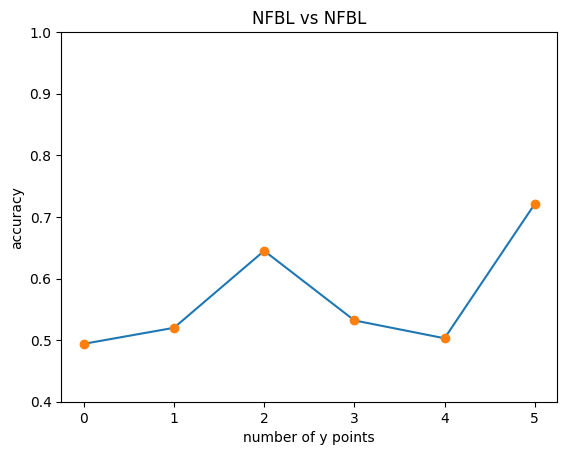

In [15]:
plt.plot(np.arange(6), acc)
plt.plot(np.arange(6), acc, "o")
plt.ylabel("accuracy")
plt.xlabel("number of y points")
plt.title("NFBL vs NFBL")
plt.ylim(.4, 1)

0
1
2
3
4
5


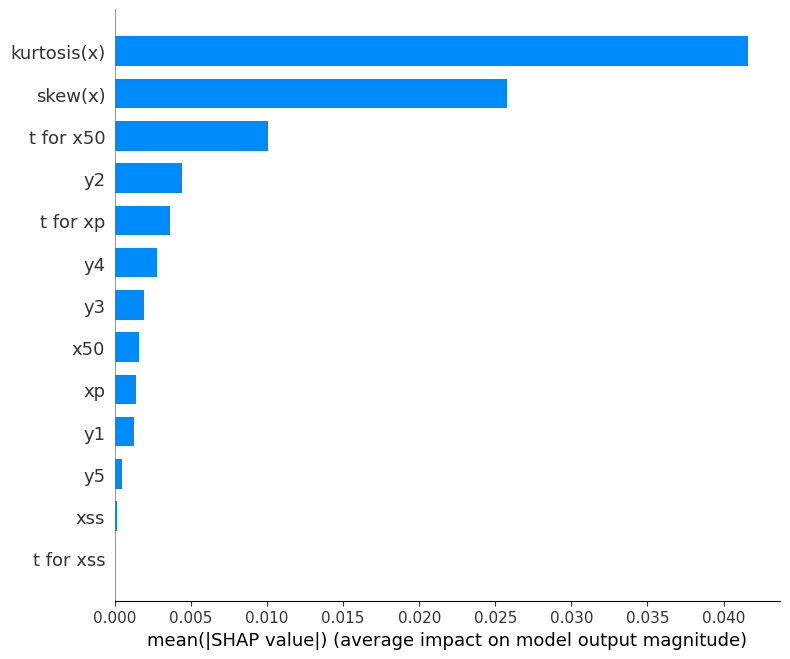

In [16]:
shap_proportions = []
for i, model in enumerate(models):
    print(i)
    explainer = shap.DeepExplainer(model, data_cxy[:100, 0:8+i])
    shap_values = explainer.shap_values(data_cxy[:, 0:8+i])
    average_shap_values = np.average(shap_values, axis=1)
    abs_average_shap_values = np.absolute(average_shap_values)
    sum_abs_average_shap_values = np.sum(abs_average_shap_values, axis=0)
    proportions = sum_abs_average_shap_values/np.sum(sum_abs_average_shap_values)
    shap_proportions.append(proportions)
    
modified_shap_proportion = []
for i, shap_proportion in enumerate(shap_proportions):
    if len(shap_proportion) == 8:
        modified_shap_proportion.append(np.concatenate((shap_proportion, [0])))
    else:
        modified_shap_proportion.append(np.concatenate((shap_proportion[:8], [np.sum(shap_proportion[8:])])))
        
np_modified_shap_proportion = np.array(modified_shap_proportion).T
shap.summary_plot(abs_average_shap_values, labels, plot_type="bar")

Text(0.5, 1.0, 'NFBL vs NFBL SHAP Values')

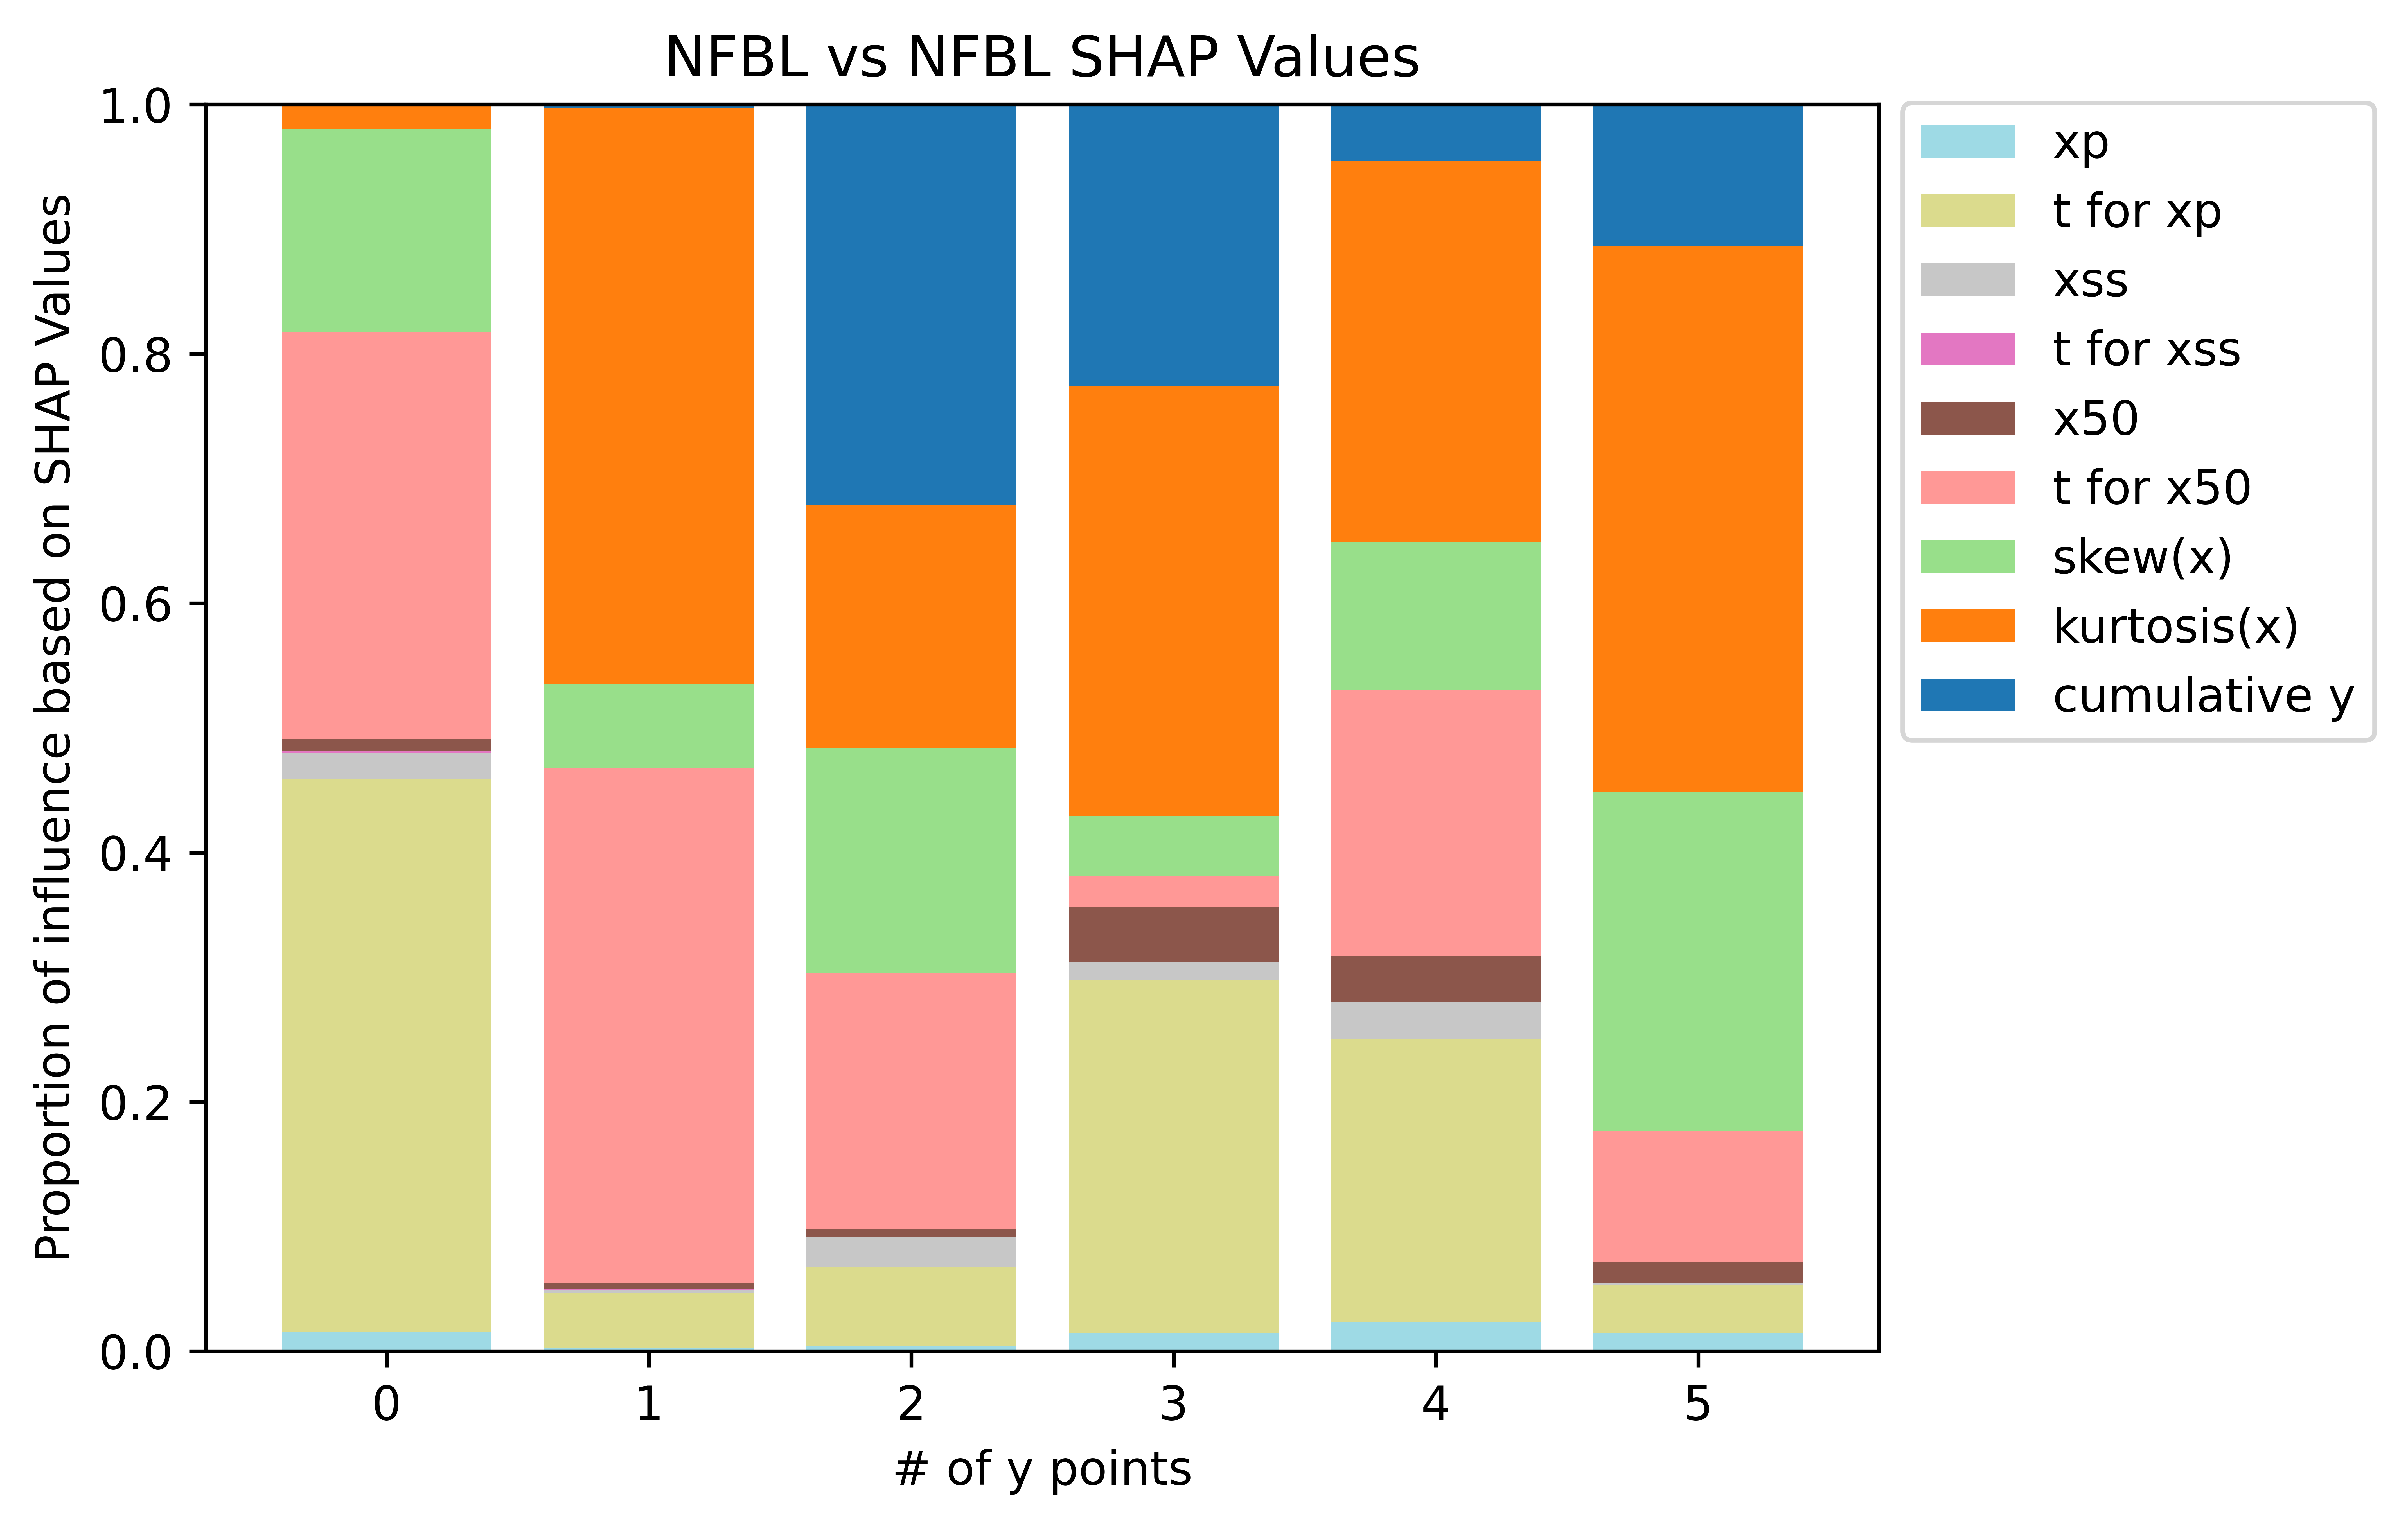

In [17]:
plt.figure(dpi=1200)
bottom = [0] * len(np_modified_shap_proportion[0])
for i, value in enumerate(np_modified_shap_proportion):
    plt.bar(np.arange(6), value, bottom=bottom, label=labels[i] if i != 8 else "cumulative y", color=slicedCM[len(np_modified_shap_proportion)-i-1]) 
    bottom += value
plt.legend(bbox_to_anchor=(1.0, 1.02), loc="upper left")
plt.xlabel("# of y points")
plt.ylabel("Proportion of influence based on SHAP Values")
plt.title("NFBL vs NFBL SHAP Values")

In [18]:
acc = []
models = []
for m in range(6):
    data_cxy = np.loadtxt("data/iffl_vs_iffl_signal_yrand2.dat").astype(np.float32)[:, 0:8+m]
    label_cxy = np.loadtxt("data/iffl_vs_iffl_lbs_yrand2.dat").astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)
    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.001
    H=10
    
    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()
    
    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)
    
    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)
    epochs = 2000
    
    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()
            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)
    
    acc.append(accuracy_list[-1])
    models.append(model)
    
    print(m, "data points", "acc", acc[-1])

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0 data points acc 0.496
1 data points acc 0.503
2 data points acc 0.489
3 data points acc 0.49
4 data points acc 0.488
5 data points acc 0.496


(0.4, 1.0)

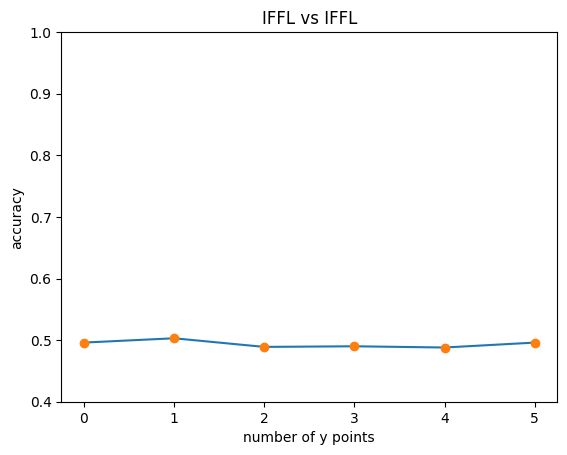

In [19]:
plt.plot(np.arange(6), acc)
plt.plot(np.arange(6), acc, "o")
plt.ylabel("accuracy")
plt.xlabel("number of y points")
plt.title("IFFL vs IFFL")
plt.ylim(.4, 1)

In [20]:
shap_proportions = []
for i, model in enumerate(models):
    print(i)
    explainer = shap.DeepExplainer(model, data_cxy[:100, 0:8+i])
    shap_values = explainer.shap_values(data_cxy[:, 0:8+i])
    average_shap_values = np.average(shap_values, axis=1)
    abs_average_shap_values = np.absolute(average_shap_values)
    sum_abs_average_shap_values = np.sum(abs_average_shap_values, axis=0)
    proportions = sum_abs_average_shap_values/np.sum(sum_abs_average_shap_values)
    shap_proportions.append(proportions)
    
modified_shap_proportion = []
for i, shap_proportion in enumerate(shap_proportions):
    if len(shap_proportion) == 8:
        modified_shap_proportion.append(np.concatenate((shap_proportion, [0])))
    else:
        modified_shap_proportion.append(np.concatenate((shap_proportion[:8], [np.sum(shap_proportion[8:])])))
    np_modified_shap_proportion = np.array(modified_shap_proportion).T

0


unrecognized nn.Module: Flatten


1
2
3
4
5


Text(0.5, 1.0, 'IFFL vs IFFL SHAP Values')

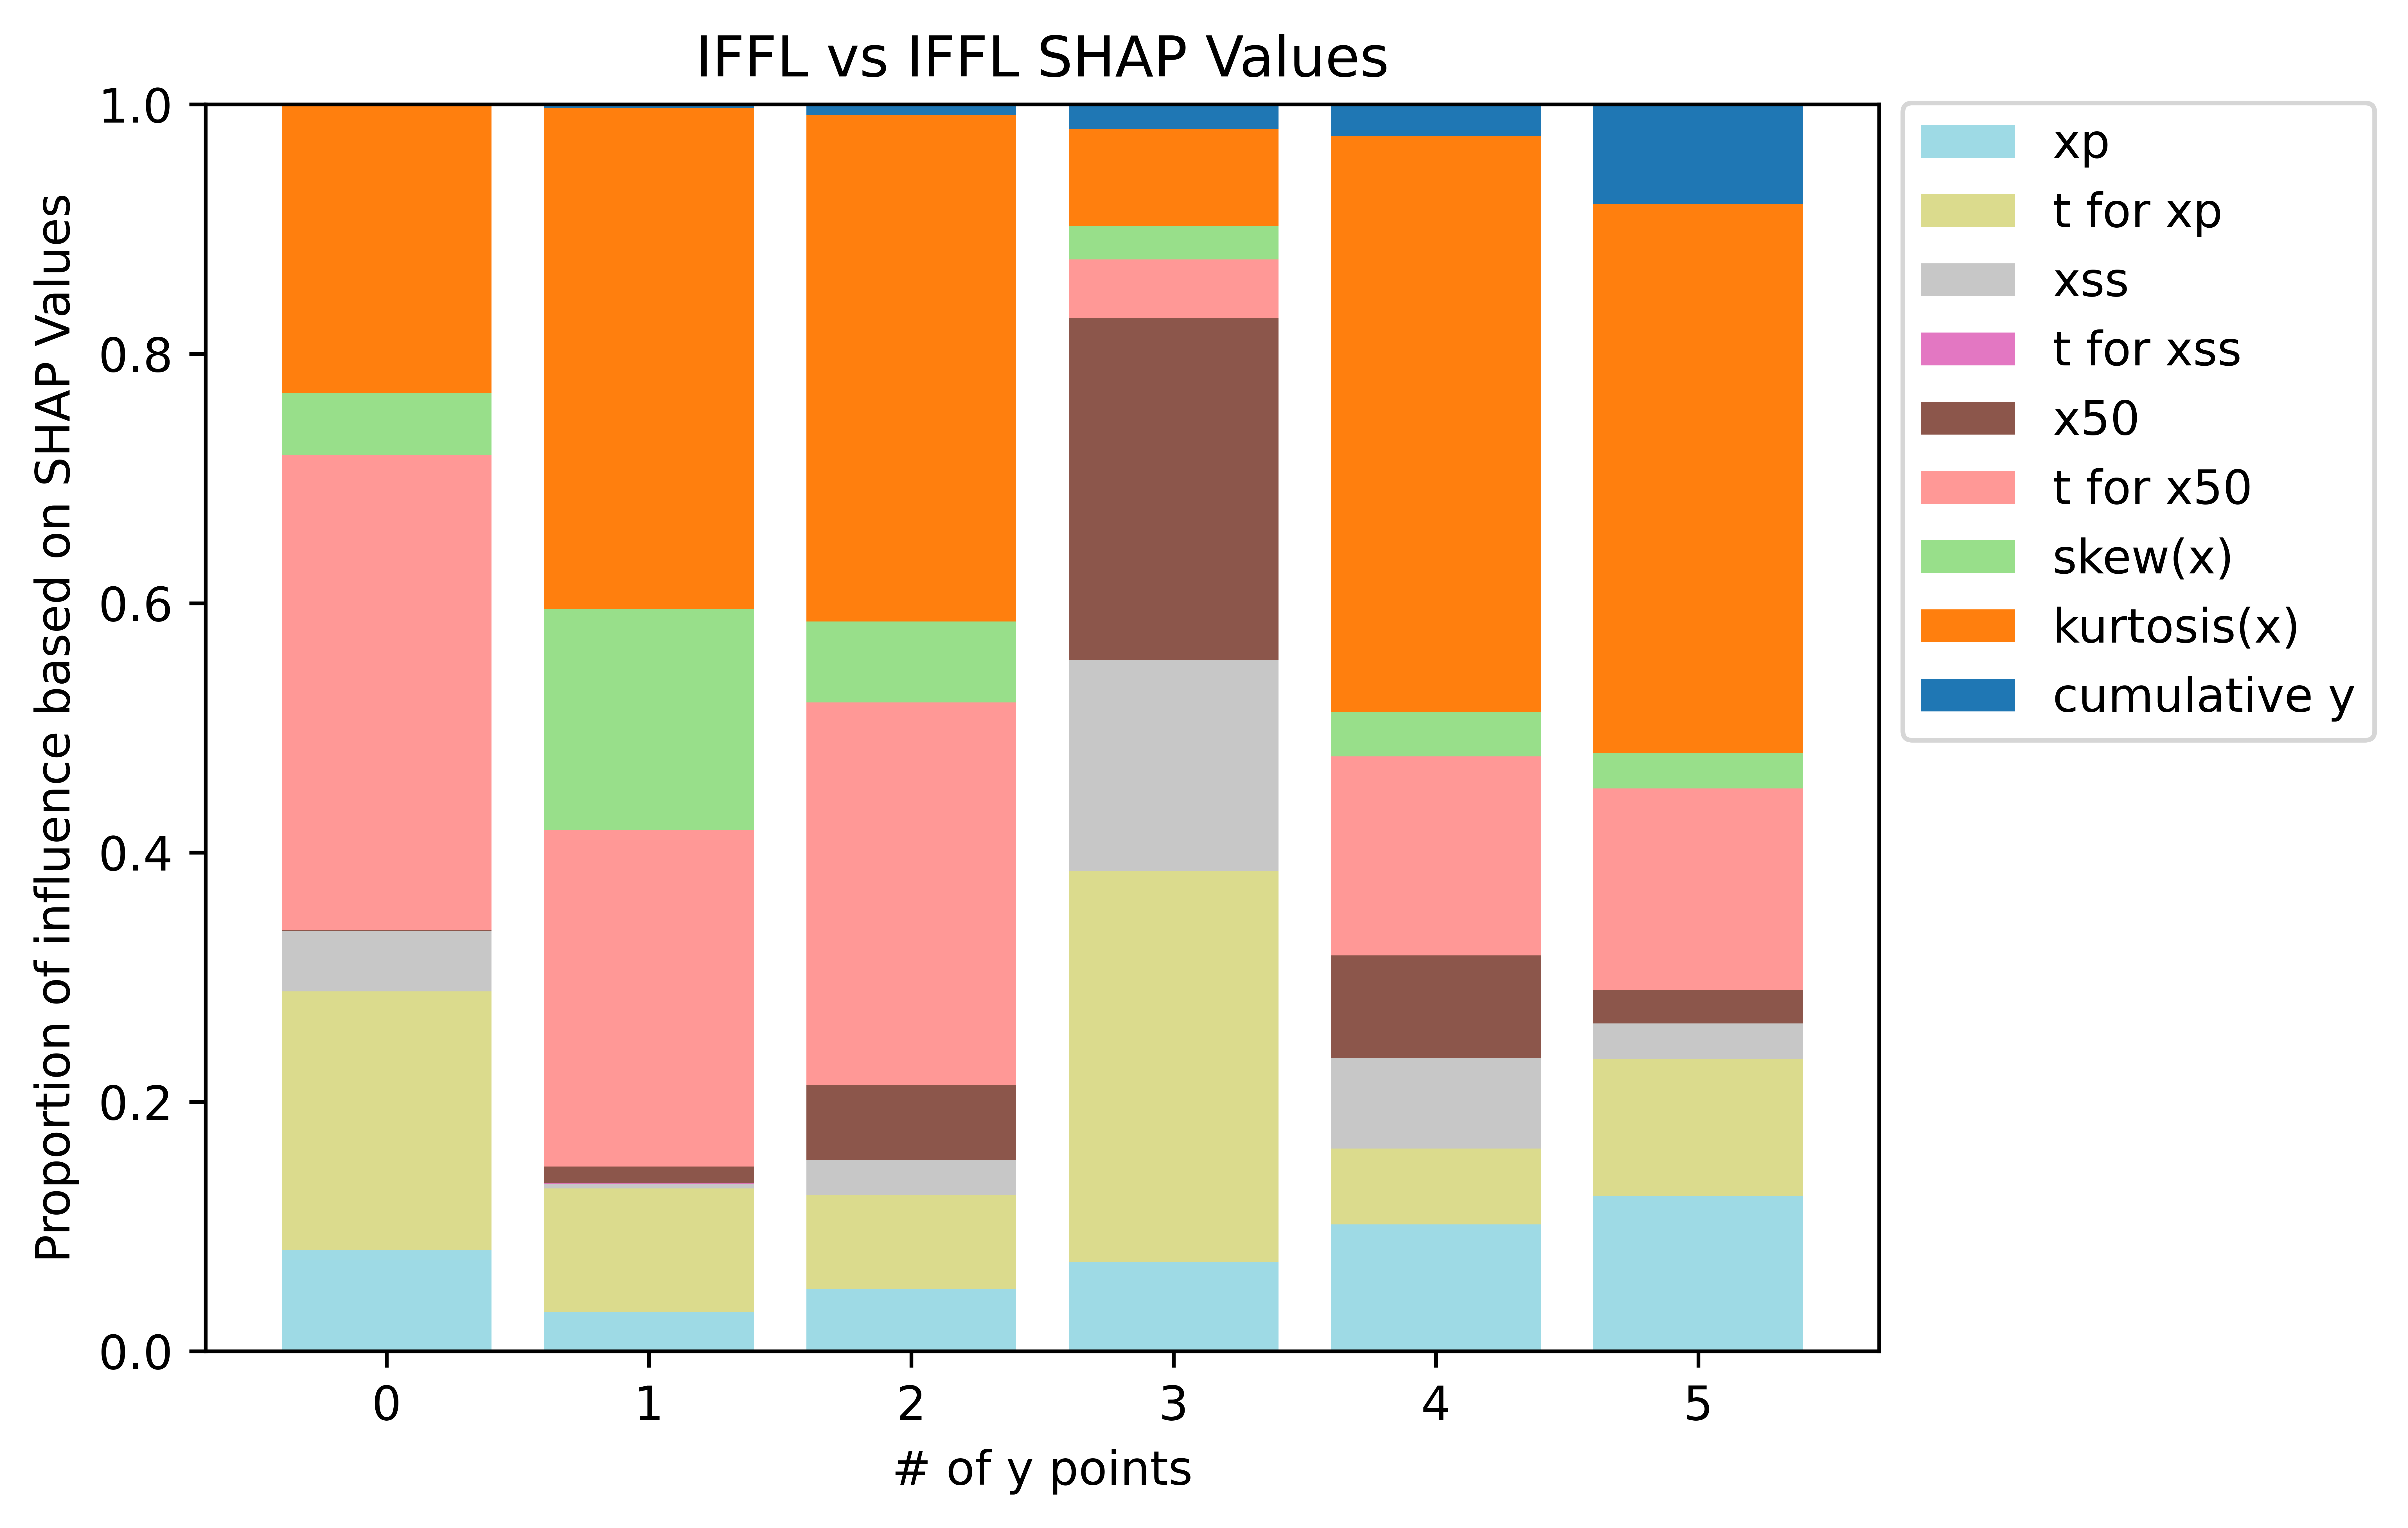

In [21]:
plt.figure(dpi=1200)
bottom = [0] * len(np_modified_shap_proportion[0])
for i, value in enumerate(np_modified_shap_proportion):
    plt.bar(np.arange(6), value, bottom=bottom, label=labels[i] if i != 8 else "cumulative y", color=slicedCM[len(np_modified_shap_proportion)-i-1])
    bottom += value

plt.legend(bbox_to_anchor=(1.0, 1.02), loc="upper left")
plt.xlabel("# of y points")
plt.ylabel("Proportion of influence based on SHAP Values")
plt.title("IFFL vs IFFL SHAP Values")